In this project I will analyze passenger data from the passenger liner RMS Titanic's tragic mayden voyage in April 1912. I will use the dataset located at https://www.udacity.com/api/nodes/5420148578/supplemental_media/titanic-datacsv/download?_ga=1.248296128.651510525.1453551417 as basis for my analysis. The dataset "contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic".

**Dataset description** from Kaggle:

~~~~
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
~~~~

I will start by doing some exploratory data analysis with the following initial question in mind:
- **Which factor(s) had the greatest impact on survival rate?**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from IPython.display import display
from IPython.display import HTML

%matplotlib inline

In [28]:
#loading data

titanic = pd.read_csv('titanic_data.csv')



In [29]:
#Inital exploration

from IPython.display import display

print(titanic.columns)

print("number of passenger records:", len(titanic))

display(titanic.head(5))

display(titanic.iloc[5])

display(titanic[titanic['Age'] == 32])

display(titanic.info())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
number of passenger records: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,S
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S
569,570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

In [30]:
#ELVEE SKIP FOR NOW
#Issues with age, will need to look closer into
print(titanic['Age'].describe())

display(titanic[titanic['Age'] == titanic['Age'].min()])

display(titanic['Age'].head(10))

display(titanic[titanic['Age'] == 32])

titanic.groupby('Age')['PassengerId'].agg('count')

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64


/Users/ggaasemyr/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,S
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S
569,570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S


Age
0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      6
4.00     10
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
11.00     4
12.00     1
13.00     2
14.00     6
14.50     1
15.00     5
16.00    17
17.00    13
18.00    26
19.00    25
20.00    15
20.50     1
21.00    24
22.00    27
23.00    15
         ..
44.00     9
45.00    12
45.50     2
46.00     3
47.00     9
48.00     9
49.00     6
50.00    10
51.00     7
52.00     6
53.00     1
54.00     8
55.00     2
55.50     1
56.00     4
57.00     2
58.00     5
59.00     2
60.00     4
61.00     3
62.00     4
63.00     2
64.00     2
65.00     3
66.00     1
70.00     2
70.50     1
71.00     2
74.00     1
80.00     1
Name: PassengerId, dtype: int64

In [31]:
#Making 'Sex' numeric to be able to perform mathematical operations using the variable
titanic['is_male'] = np.repeat(np.nan,len(titanic))
titanic['is_female'] = np.repeat(np.nan,len(titanic))

titanic['is_male'][titanic['Sex'] == 'male'] = True
titanic['is_male'][titanic['Sex'] == 'female'] = False
titanic['is_female'][titanic['Sex'] == 'female'] = True
titanic['is_female'][titanic['Sex'] == 'male'] = False

display(titanic['is_male'].value_counts())
display(titanic['is_female'].value_counts())
display(titanic['Sex'].value_counts())

/Users/ggaasemyr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ggaasemyr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ggaasemyr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1.0    577
0.0    314
Name: is_male, dtype: int64

0.0    577
1.0    314
Name: is_female, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

,Survived
PassengerId,-0.01
Survived,1.00
Pclass,-0.34
Age,-0.08
SibSp,-0.04
Parch,0.08
Fare,0.26
is_male,-0.54
is_female,0.54


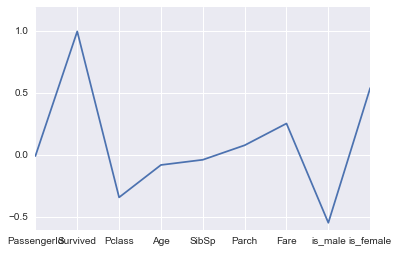

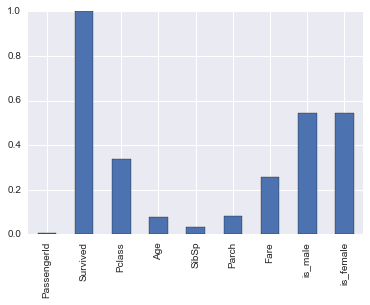

In [32]:
#Looking at survival correlation using the Pandas corr() (Pearson's correlation coefficient) function

survival_correlation = titanic.corr()['Survived']

display(round(survival_correlation,2).to_frame())

survival_correlation.plot()
plt.show()

np.sqrt(survival_correlation ** 2).plot(kind='bar')

This indicates that sex (being female) and passenger class where the most important factors for survival on the Titanic, with high and medium correlation scores. Ticket price also has a fairly large correlation score (Pearson's correlation coefficient). I suspect this is due to better ticket classes costing more, which I will test for next.

In [33]:
display(round(titanic.corr()['Fare'],2).to_frame())

display(round(titanic.groupby('Pclass')['Fare'].describe(),2).to_frame())


,Fare
PassengerId,0.01
Survived,0.26
Pclass,-0.55
Age,0.10
SibSp,0.16
Parch,0.22
Fare,1.00
is_male,-0.18
is_female,0.18


Fare
Pclass              
1      count  216.00
       mean    84.15
       std     78.38
       min      0.00
       25%     30.92
       50%     60.29
       75%     93.50
       max    512.33
2      count  184.00
       mean    20.66
       std     13.42
       min      0.00
       25%     13.00
       50%     14.25
       75%     26.00
       max     73.50
3      count  491.00
       mean    13.68
       std     11.78
       min      0.00
       25%      7.75
       50%      8.05
       75%     15.50
       max     69.55

In [34]:
#Looking further at the passengers who did not pay for their tickets (ticket price 0)

zero_fare = (titanic[titanic['Fare'] == 0].sort_values('Pclass'))

display(zero_fare)

zero_fare.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male,is_female
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,1.0,0.0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,1.0,0.0
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,1.0,0.0
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,1.0,0.0
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,1.0,0.0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,1.0,0.0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,1.0,0.0
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,1.0,0.0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,1.0,0.0
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S,1.0,0.0


/Users/ggaasemyr/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,is_male,is_female
count,15.000000,15.000000,15.000000,7.000000,15.0,15.0,15.0,15.0,15.0
mean,516.400000,0.066667,1.933333,35.142857,0.0,0.0,0.0,1.0,0.0
std,225.808958,0.258199,0.798809,10.023781,0.0,0.0,0.0,0.0,0.0
min,180.000000,0.000000,1.000000,19.000000,0.0,0.0,0.0,1.0,0.0
25%,290.500000,0.000000,1.000000,NaN,0.0,0.0,0.0,1.0,0.0
50%,482.000000,0.000000,2.000000,NaN,0.0,0.0,0.0,1.0,0.0
75%,704.000000,0.000000,2.500000,NaN,0.0,0.0,0.0,1.0,0.0
max,823.000000,1.000000,3.000000,49.000000,0.0,0.0,0.0,1.0,0.0


In [35]:
#ELVEE: do you prefer this display or the one below? Same data.
#Checking for corelation again, excluding passenger who did not pay for their tickets.

display(round((titanic[titanic['Fare'] > 0].corr()['Fare']),2).to_frame())

,Fare
PassengerId,0.02
Survived,0.25
Pclass,-0.56
Age,0.10
SibSp,0.16
Parch,0.21
Fare,1.00
is_male,-0.18
is_female,0.18


In [36]:
#ELVEE: do you prefer this display or the one above? Same data.
#Checking for corelation again, excluding passenger who did not pay for their tickets.

display(round((titanic[titanic['Fare'] > 0].corr()['Fare']),2))

PassengerId    0.02
Survived       0.25
Pclass        -0.56
Age            0.10
SibSp          0.16
Parch          0.21
Fare           1.00
is_male       -0.18
is_female      0.18
Name: Fare, dtype: float64

Since the correlation between ticket class and ticket price is high, I will only look at ticket class as a social class indicator going forward, and I will not look at ticket price again.

In [41]:
#counting survivors by ticket class and sex
gb_survival_class_sex = titanic.groupby(['Pclass','Sex'])['Survived'].agg({'Passengers':'count','Survived':'sum'})
#calculating percentage of survivors
gb_survival_class_sex['percent_survived'] = round(
    (gb_survival_class_sex['Survived'] / gb_survival_class_sex['Passengers']) * 100,2
)

#counting survivors by sex
gb_survival_by_sex = titanic.groupby(['Sex'])['Survived'].agg({'Passengers':'count','Survived':'sum'})
#calculating percentage of survivors
gb_survival_by_sex['percent_survived'] = round(
    (gb_survival_by_sex['Survived'].div(gb_survival_by_sex['Passengers'],level='Sex')) * 100,2)

display(gb_survival_class_sex)
display(gb_survival_by_sex)

#gb_survival_class_sex['Survived'].div(gb_survival_sex['Passengers'],level='Sex')


Survived  Passengers  percent_survived
Pclass Sex                                           
1      female        91          94             96.81
       male          45         122             36.89
2      female        70          76             92.11
       male          17         108             15.74
3      female        72         144             50.00
       male          47         347             13.54

,Survived,Passengers,percent_survived
Sex,,,
female,233,314,74.20
male,109,577,18.89


We see here why the correlation between survival and sex is so high: 74.2% of females survived, but only 18.9% of males survived.

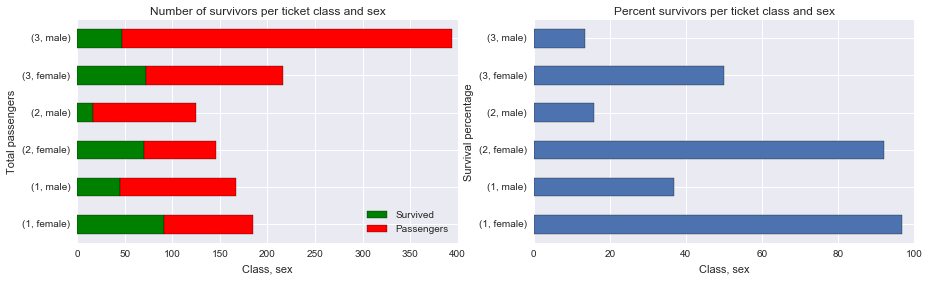

In [43]:
# col_labels = gb_survival_class_sex.index.levels[1]
# row_labels = gb_survival_class_sex.index.levels[0]
# table_vals = list()

# for row in row_labels:
#     for col in col_labels:
#         table_vals.append(gb_survival_class_sex.loc[row,col]['percent_survived'])

#plt.subplot(1,2,1)        
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,4))

plt.title("Number of survivors per ticket class and sex")

gbplot1 = gb_survival_class_sex[['Survived','Passengers']].plot(
    kind='barh',ax=axes[0],stacked=True,color=['g','r']
)

#gbplot.set_xticklabels(['females 1st class','males 1st class', 'females 2nd class',
#                       'males 2nd class','females 3rd class', 'males 3rd class'])

gbplot1.set_xlabel("Class, sex")
gbplot1.set_ylabel("Total passengers")
gbplot1.set_title("Number of survivors per ticket class and sex")

#plt.subplot(2,1,2)


#collabel=("col 1", "col 2","col 3")
#the_table = gbplot.table(cellText=gb_survival_class_sex[['percent_survived']].to_records(),colLabels=collabel,loc='center')
#----------
# plt.subplot(2,1,2)
# fig, axs =plt.subplots(2,1)
# clust_data = np.random.random((10,3))
# collabel=("col 1", "col 2", "col 3")
# axs[0].axis('tight')
# axs[0].axis('off')
# the_table = axs[0].table(cellText=clust_data,colLabels=collabel,loc='center')

# axs[1].plot(clust_data[:,0],clust_data[:,1])

#----------

gbplot2 = gb_survival_class_sex['percent_survived'].plot(kind='barh',ax=axes[1])

gbplot2.set_xlabel("Class, sex")
gbplot2.set_ylabel("Survival percentage")
gbplot2.set_title("Percent survivors per ticket class and sex")

plt.show()

#plt.subplot(1,2,2)

#plt.close()

#gb_survival_class_sex.reset_index(level=1)


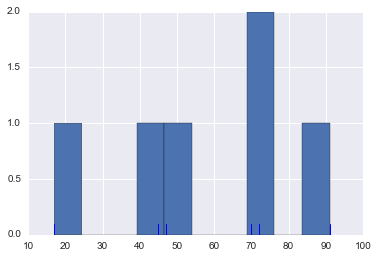

In [53]:
plt.hist(gb_survival_class_sex['Survived'], alpha=1)
sns.rugplot(gb_survival_class_sex['Survived']);

The plots above highlights how much class determined likelihood of survival on the Titanic. We see that while the large majority of females in 2nd and 1st class survived, only half of the females in 3rd class survived. It's interesting to observe that this group of passengers still had a higher survival rate than any of the male groups, where the highest survival rate were the first class passengers. Only a little over a third of the male first class passengers survived.

__To do next:__

1. <s>Finish the plot of survival and gender. See http://stackoverflow.com/questions/8524401/how-can-i-place-a-table-on-a-plot-in-matplotlib</s>
2. <s>Clean up: go through and see what's worth keeping, and remove the rest.</s> 
    2a. Sort out data issues. Age at least.
3. <s>Upload HTML and get feedback from Elvee.</s>
4. Look at correlation between survival and embarked
5. Look at age cutoff, to see if children survived, and see what age was considered children.
6. Perform statistical tests for significance of findings
7. See whether everything in https://review.udacity.com/#!/rubrics/107/view is covered
8. Write a conclusion, which does not imply correlation equals causation

_Sources_


__Python documentation, book:__  
McKinney, Wes, 2012. _Python for Data Analysis_. O'Reilly Media

__Python documentation, websites:__  

__Dataset details:__
https://www.kaggle.com/c/titanic/data


Statistical methods and terminology are largely based on teachings from the Descriptive Statistics and Inferential Statistics Udacity courses.

__Other statistics resources:__  
